<a href="https://colab.research.google.com/github/maneesh51/NLP_Udemy_Course/blob/main/Prj1_SpamMessage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam message Classification

##### 1. Data preprocessing
##### 2. Model 1 building (Random forest)
##### 3. Predictions 1
##### 4. Model 2 building (SVM)
##### 5. Predictions 2


## 1. Data Preprocessing

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### Saving model with pickle
import pickle
import sklearn

In [82]:
print(sklearn.__version__)

1.0.2


In [2]:
df = pd.read_csv('spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
## check for missing records
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
## percentage of data in ham vs spam
df.label.value_counts()*100/len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [6]:
### since the data is biased, we therefore, should not train any model on full dataset
### Let's make data 50-50% in both category

ham = df[df.label=='ham']
spam = df[df.label=='spam']

print(ham.shape, spam.shape)

(4825, 4) (747, 4)


In [7]:
ham = ham.sample(spam.shape[0])
data = ham.append(spam, ignore_index=True)

print(ham.shape, spam.shape, data.shape, '\n', data.label.value_counts())

(747, 4) (747, 4) (1494, 4) 
 ham     747
spam    747
Name: label, dtype: int64


C:\Users\genxm\AppData\Local\Temp\ipykernel_11152\1117540610.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index=True)


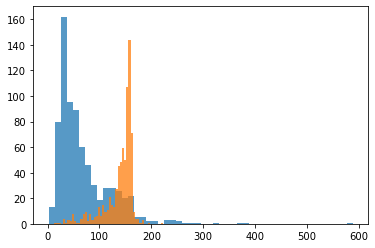

In [8]:
### try some visualization, to see if there is any information

plt.hist(data[data['label']=='ham']['length'], bins=50, alpha=0.75)
plt.hist(data[data['label']=='spam']['length'], bins=50, alpha=0.75)
plt.show()

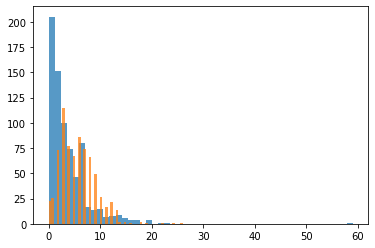

In [9]:
plt.hist(data[data['label']=='ham']['punct'], bins=50, alpha=0.75)
plt.hist(data[data['label']=='spam']['punct'], bins=50, alpha=0.75)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.2, random_state=0, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1195,) (299,) (1195,) (299,)


## 2. Building model 1 : Random forest 

In [67]:
### converting mails or text data into numbers

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [68]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=10))])

classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [69]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy  = accuracy_score(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)

print(y_pred.shape, '\nAccuracy', accuracy, '\nConfusion matrix:\n', confusionmatrix)
print('\n\n\n',classification_report(y_test, y_pred))

(299,) 
Accuracy 0.9331103678929766 
Confusion matrix:
 [[147   4]
 [ 16 132]]



               precision    recall  f1-score   support

         ham       0.90      0.97      0.94       151
        spam       0.97      0.89      0.93       148

    accuracy                           0.93       299
   macro avg       0.94      0.93      0.93       299
weighted avg       0.94      0.93      0.93       299



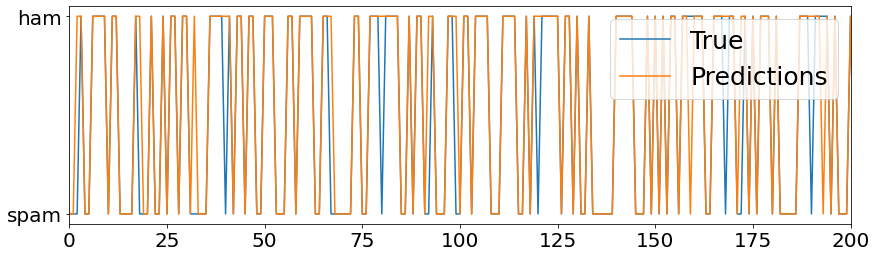

In [70]:
from matplotlib.pyplot import figure

figure(figsize=(14, 4))

plt.plot(np.asarray(y_test), label='True')
plt.plot(y_pred, label='Predictions')

plt.xlim(0, 200)
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [71]:
### saving model

# pickle.dump(classifier, open('spam_clf_randomforest.pkl', 'wb'))


## Model - 2 : Support Vector Machime (SVM) 

In [72]:
from sklearn.svm import SVC

svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto', probability=True))])

svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto', probability=True))])

In [73]:
y_pred2 = svm.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy  = accuracy_score(y_test, y_pred2)
confusionmatrix = confusion_matrix(y_test, y_pred2)

print(y_pred.shape, '\nAccuracy', accuracy, '\nConfusion matrix:\n', confusionmatrix)
print('\n\n\n',classification_report(y_test, y_pred2))

(299,) 
Accuracy 0.9498327759197325 
Confusion matrix:
 [[151   0]
 [ 15 133]]



               precision    recall  f1-score   support

         ham       0.91      1.00      0.95       151
        spam       1.00      0.90      0.95       148

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



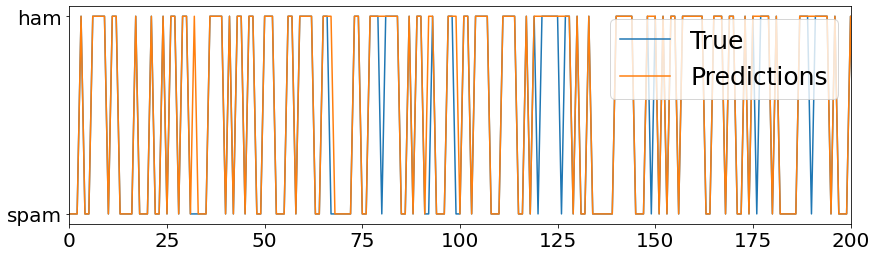

In [74]:
from matplotlib.pyplot import figure

figure(figsize=(14, 4))

plt.plot(np.asarray(y_test), label='True')
plt.plot(y_pred2, label='Predictions')

plt.xlim(0, 200)
plt.legend(fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [75]:
### saving model

# pickle.dump(svm, open('spam_clf_svm.pkl', 'wb'))

## Testing on self written mails

In [46]:
test1 = 'Hello, I urgently need you to send me google play cards'
test2 = 'Dear ABC, gentle reminder for meeting at 2pm today.'
test3 = 'congratulations, you won a lottery of $1 Million! Call to claim: +113456789.'

In [76]:
tests = [test1, test2, test3]
print(classifier.predict(tests), svm.predict(tests))

['ham' 'ham' 'spam'] ['ham' 'ham' 'spam']


In [77]:
classifier.predict_proba(tests)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0.3, 0.7]])

In [78]:
svm.predict_proba([test3])

array([[0.00537781, 0.99462219]])